# UMAP 2D histogram

In [12]:
# imports
import numpy as np

from matplotlib import pyplot as plt

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# Load table

In [4]:
tbl_file = 's3://modis-l2/Tables/MODIS_L2_std.parquet'

In [5]:
modis_tbl = ulmo_io.load_main_table(tbl_file)

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


## Remove NAN

In [7]:
good = np.isfinite(modis_tbl.LL)
modis_tbl = modis_tbl[good].copy()

# Histogram

In [30]:
xmin, xmax = -4.5, 7
ymin, ymax = 4.5, 10.5
# Histogram
scl = 1
bins_U0 = np.linspace(xmin, xmax, 23*scl)
bins_U1 = np.linspace(ymin,ymax, 24*scl)
counts, xedges, yedges = np.histogram2d(modis_tbl.U0, modis_tbl.U1,
                                        bins=(bins_U0, bins_U1))

In [31]:
dx = bins_U0[1]-bins_U0[0]
dy = bins_U1[1]-bins_U1[0]
dx, dy

(0.5227272727272725, 0.2608695652173916)

# Plot

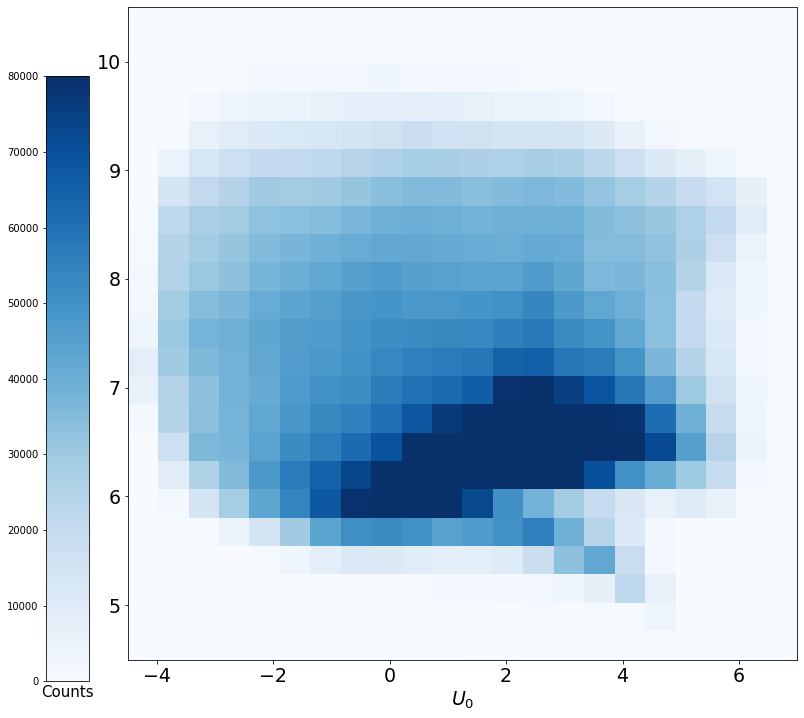

In [27]:
fig = plt.figure(figsize=(12, 12))
plt.clf()
ax = plt.gca()

cm = plt.get_cmap('Blues')
values = counts.transpose()
lbl = 'Counts'
mplt = ax.pcolormesh(xedges, yedges, values, cmap=cm, vmax=20000/(scl/2)**2)

# Color bar
cbaxes = fig.add_axes([0.03, 0.1, 0.05, 0.7])
cb = plt.colorbar(mplt, cax=cbaxes, aspect=20)
#cb.set_label(lbl, fontsize=20.)
cbaxes.yaxis.set_ticks_position('left')
cbaxes.set_xlabel(lbl, fontsize=15.)

ax.set_xlabel(r'$U_0$')
ax.set_ylabel(r'$U_1$')

plotting.set_fontsize(ax, 19.)
plt.savefig('umap_2dhist.png', dpi=300)
plt.show()